# Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate Mock Data

In [2]:
# Generate mock transaction data

np.random.seed(42)

num_transactions = 5000

num_customers = 500

products = [f'Prod_{100+i}' for i in range(20)]

start_date = datetime(2022, 1, 1)

end_date = datetime(2023, 12, 31)

date_range_days = (end_date - start_date).days



transaction_data = []



# Customer spending profiles

customer_profiles = {

    f'CUST{1000+i}': {'avg_spend': np.random.uniform(10, 200), 'frequency_factor': np.random.uniform(0.1, 1)}

    for i in range(num_customers)

}





for i in range(num_transactions):

    customer_id = f'CUST{1000 + np.random.randint(0, num_customers)}'

    transaction_date = start_date + timedelta(days=np.random.randint(0, date_range_days))

    num_items_in_transaction = np.random.randint(1, 6)



    for _ in range(num_items_in_transaction):

        product_id = np.random.choice(products)

        quantity = np.random.randint(1, 4)

        unit_price = np.random.uniform(5, 100) * (customer_profiles[customer_id]['avg_spend'] / 50) # Tie price to customer profile somewhat

        unit_price = round(max(1.0, unit_price), 2)





        transaction_data.append({

            'TransactionID': f'TRX{50000+i}_{_}',

            'CustomerID': customer_id,

            'TransactionDate': transaction_date.strftime('%Y-%m-%d'),

            'ProductID': product_id,

            'Quantity': quantity,

            'UnitPrice': unit_price

        })



df_transactions = pd.DataFrame(transaction_data)

df_transactions['TotalPrice'] = df_transactions['Quantity'] * df_transactions['UnitPrice']


In [3]:
df=df_transactions.copy()
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06


In [4]:
df.columns

Index(['TransactionID', 'CustomerID', 'TransactionDate', 'ProductID',
       'Quantity', 'UnitPrice', 'TotalPrice'],
      dtype='object')

In [5]:
df.shape

(15143, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15143 entries, 0 to 15142
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    15143 non-null  object 
 1   CustomerID       15143 non-null  object 
 2   TransactionDate  15143 non-null  object 
 3   ProductID        15143 non-null  object 
 4   Quantity         15143 non-null  int64  
 5   UnitPrice        15143 non-null  float64
 6   TotalPrice       15143 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 828.3+ KB


In [7]:
df.describe()

,Quantity,UnitPrice,TotalPrice
count,15143.000000,15143.000000,15143.000000
mean,1.998349,103.732894,207.328918
std,0.818851,85.986186,203.743701
min,1.000000,1.220000,1.540000
25%,1.000000,34.010000,58.740000
50%,2.000000,76.970000,137.970000
75%,3.000000,154.180000,285.340000
max,3.000000,393.870000,1181.610000


In [8]:
df.isnull().sum()

TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
Quantity           0
UnitPrice          0
TotalPrice         0
dtype: int64

In [9]:
# Convert date column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['month'] = df['TransactionDate'].dt.month
# Check the data types after conversion
print(df.dtypes)

TransactionID              object
CustomerID                 object
TransactionDate    datetime64[ns]
ProductID                  object
Quantity                    int64
UnitPrice                 float64
TotalPrice                float64
month                       int32
dtype: object


# RFM Analysis

In [10]:
# Latest date for recency calculation
snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
# Group by CustomerID to compute RFM
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                     # Frequency
    'TotalPrice': 'sum'                                           # Monetary
}).rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()
rfm.head(9)


,CustomerID,Recency,Frequency,Monetary
0,CUST1000,9,41,6855.79
1,CUST1001,49,10,2856.43
2,CUST1002,7,25,2175.73
3,CUST1003,22,33,1085.57
4,CUST1004,134,27,6887.81
5,CUST1005,20,36,1112.01
6,CUST1006,13,38,14374.53
7,CUST1007,167,38,3812.45
8,CUST1008,18,25,3374.25


# Analyzing the monthly variation in sales volume.(of all year)

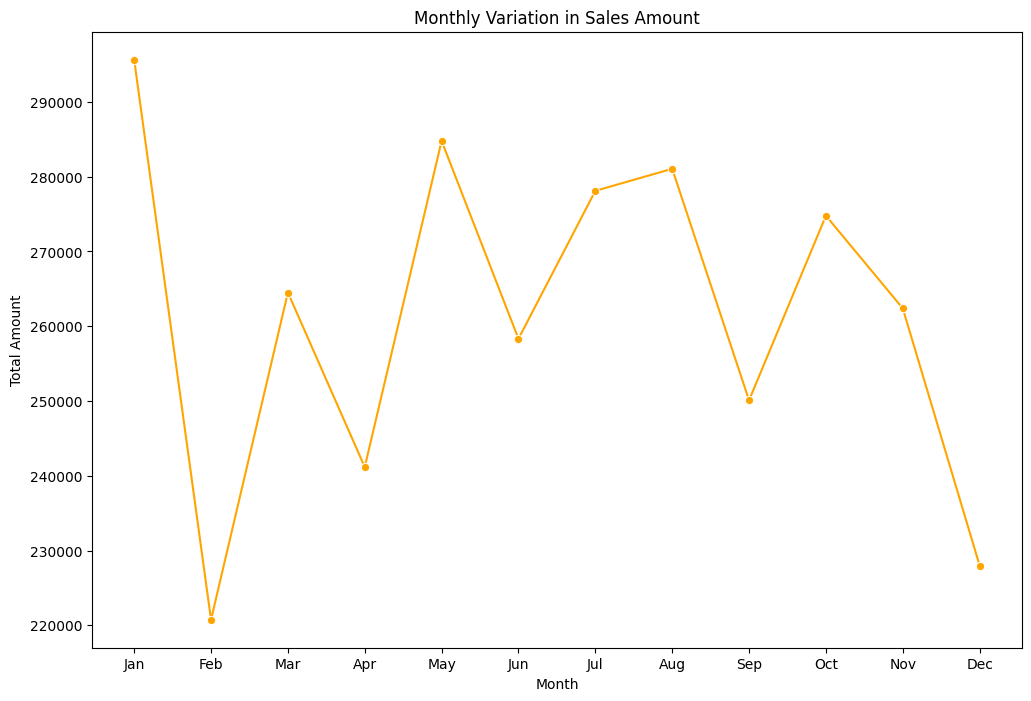

In [11]:

monthly_sales_amount = df.groupby('month')['TotalPrice'].sum()

plt.figure(figsize= (12,8))
sns.lineplot(x=monthly_sales_amount.index, y=monthly_sales_amount.values, marker = 'o', color = 'orange')
plt.title('Monthly Variation in Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [12]:
# Check values of monthly_sales_amount
print(monthly_sales_amount)

month
1     295646.30
2     220741.96
3     264504.01
4     241162.34
5     284785.28
6     258322.73
7     278108.34
8     281056.37
9     250093.28
10    274778.32
11    262392.19
12    227990.68
Name: TotalPrice, dtype: float64


# seasonal trends or patterns in customer shopping behavior.

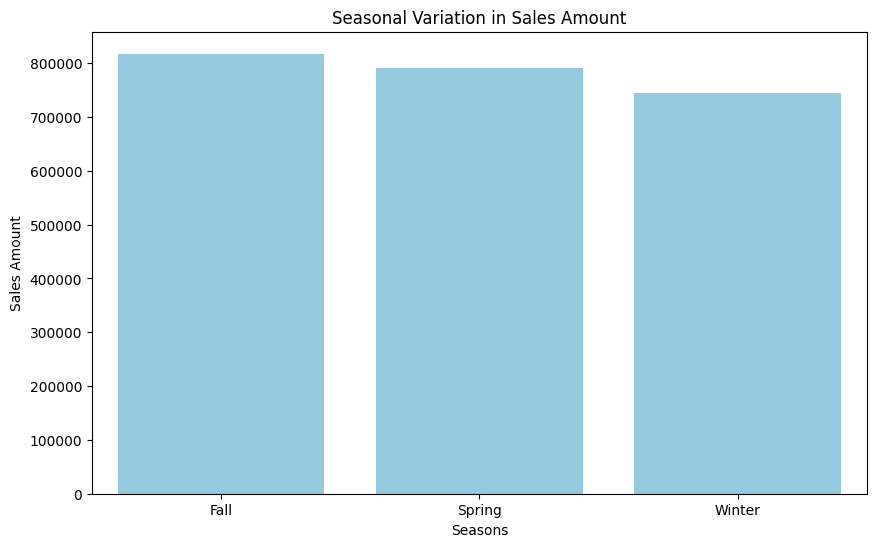

In [13]:


def map_to_season(month):
  if month in [12, 1 , 2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Fall'

df['seasons'] = df['month'].apply(map_to_season)

seasonal_sales = df.groupby('seasons')['TotalPrice'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, color= 'skyblue')
plt.title('Seasonal Variation in Sales Amount')
plt.xlabel('Seasons')
plt.ylabel('Sales Amount')
plt.show()


# Top selling products

In [14]:

df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)


ProductID
Prod_116    1623
Prod_111    1578
Prod_109    1578
Prod_107    1570
Prod_108    1563
Prod_105    1561
Prod_115    1550
Prod_114    1549
Prod_112    1529
Prod_102    1520
Name: Quantity, dtype: int64

# Top customers by Sales Amount

In [15]:

df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)


CustomerID
CUST1342    20453.50
CUST1195    18915.61
CUST1113    18898.14
CUST1188    18526.01
CUST1266    18511.75
CUST1136    17754.94
CUST1114    17361.07
CUST1418    17288.56
CUST1124    16544.33
CUST1390    16453.62
Name: TotalPrice, dtype: float64

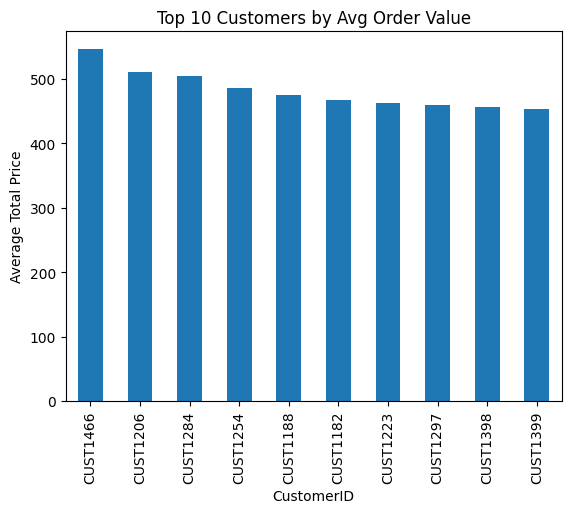

In [16]:
avg_order_value = df.groupby('CustomerID')['TotalPrice'].mean().sort_values(ascending=False).head(10)
avg_order_value.plot(kind='bar', title='Top 10 Customers by Avg Order Value')
plt.ylabel('Average Total Price')
plt.show()


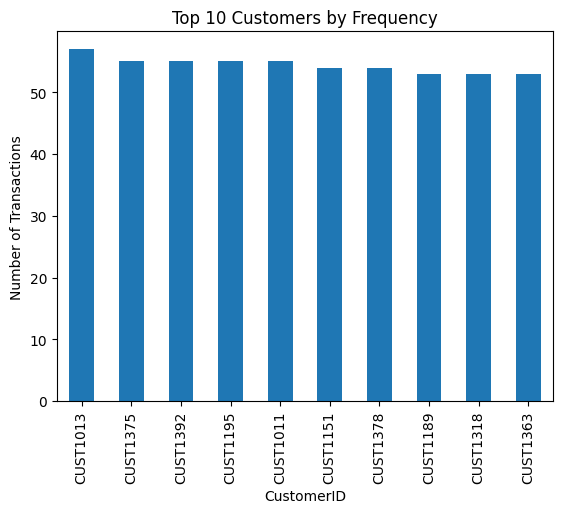

In [17]:
customer_freq = df['CustomerID'].value_counts().head(10)
customer_freq.plot(kind='bar', title='Top 10 Customers by Frequency')
plt.ylabel('Number of Transactions')
plt.show()


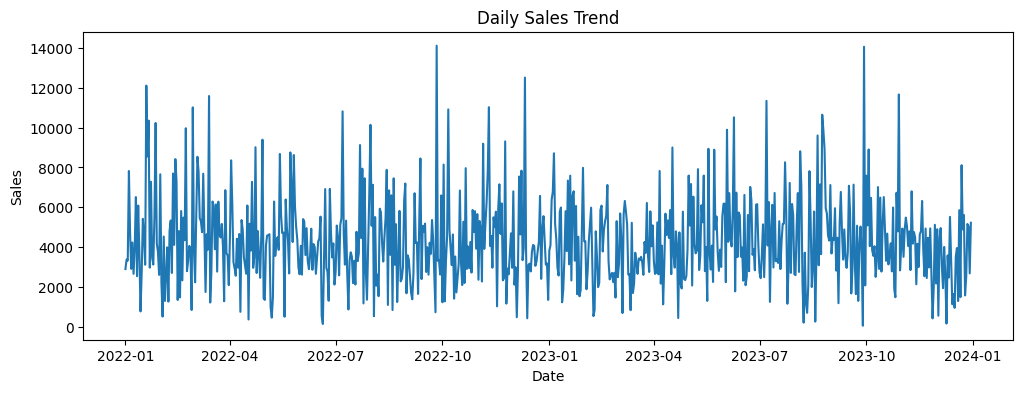

In [18]:
daily_sales = df.groupby(df['TransactionDate'].dt.date)['TotalPrice'].sum()
daily_sales.plot(figsize=(12, 4), title='Daily Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()


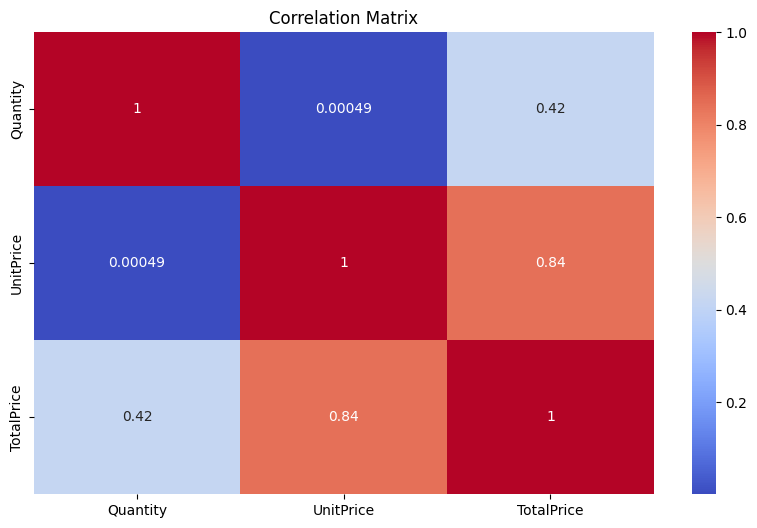

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feture scaling

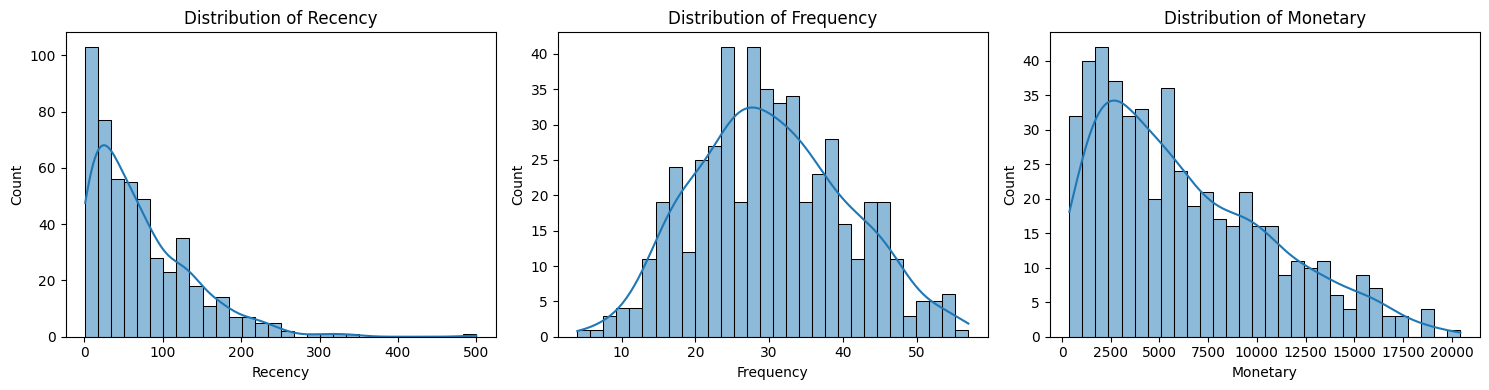

In [20]:

plt.figure(figsize=(15, 4))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Log Transformation & Feature Scaling

In [21]:

# Apply log1p transformation to reduce skewness
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log1p(x))

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform
rfm_scaled = scaler.fit_transform(rfm_log)

# Optional: Convert back to DataFrame for readability
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Display scaled data
print(rfm_scaled_df.head())


    Recency  Frequency  Monetary
0 -1.311601   0.980667  0.458701
1  0.107585  -2.729292 -0.562686
2 -1.508367  -0.347315 -0.880192
3 -0.577150   0.395533 -1.690935
4  0.983425  -0.142103  0.464138


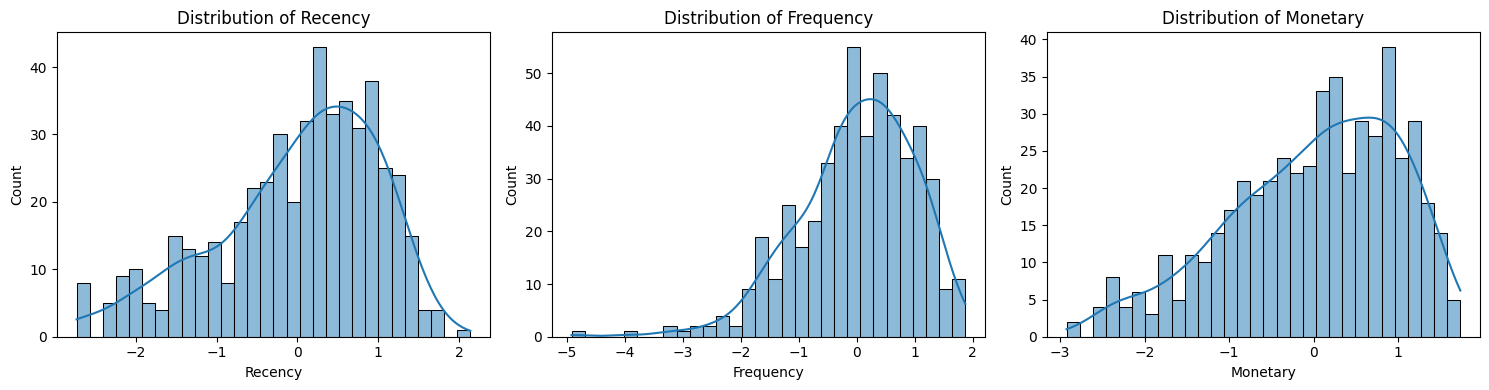

In [22]:

plt.figure(figsize=(15, 4))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm_scaled_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# KMeans clustering using Elbow method to find optimal number of clusters 

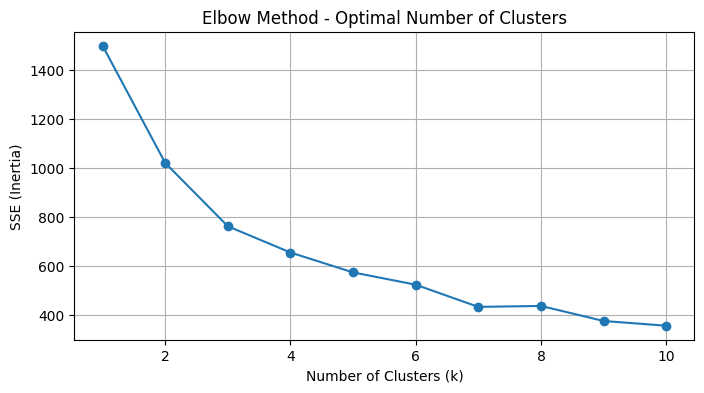

In [23]:

sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


# Silhouette Score

In [24]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled_df)
    score = silhouette_score(rfm_scaled_df, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.300
Silhouette Score for k=3: 0.311
Silhouette Score for k=4: 0.286
Silhouette Score for k=5: 0.250
Silhouette Score for k=6: 0.232
Silhouette Score for k=7: 0.268
Silhouette Score for k=8: 0.254
Silhouette Score for k=9: 0.265
Silhouette Score for k=10: 0.259


## Apply KMeans with optimal clusters based on High Silhouette Score

In [25]:
# Apply KMeans with optimal clusters (e.g., k = 3 based on High Silhouette Score)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# View customer count per segment
print(rfm['Cluster'].value_counts())


Cluster
1    232
0    154
2    114
Name: count, dtype: int64


# Map cluster labels to segment names

In [26]:
segment_map = {
    0: 'Loyal High Spenders',
    1: 'At-Risk Low Spenders',
    2: 'Regular Customers',
    3: 'Lost or One-Time Buyers'
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)


C:\Users\dell\AppData\Local\Temp\ipykernel_12828\1964623605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


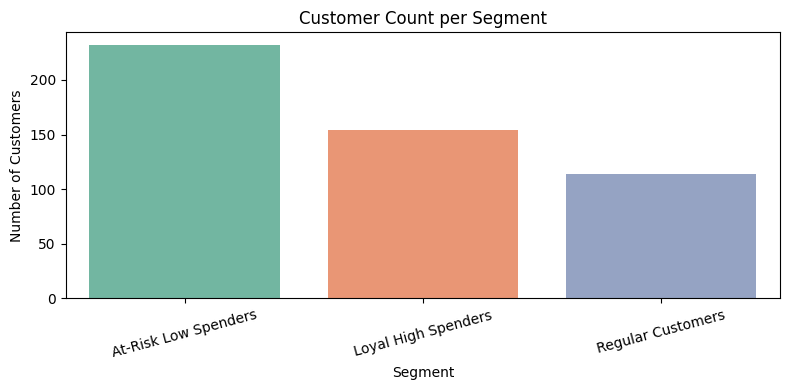

In [27]:

plt.figure(figsize=(8, 4))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title('Customer Count per Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [28]:
rfm['Segment'].value_counts()

Segment
At-Risk Low Spenders    232
Loyal High Spenders     154
Regular Customers       114
Name: count, dtype: int64

In [29]:
# Calculate mean RFM values per cluster
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_profile['CustomerCount'] = rfm['Cluster'].value_counts()
cluster_profile = cluster_profile.sort_index()
print(cluster_profile)


         Recency  Frequency  Monetary  CustomerCount
Cluster                                             
0         106.44      20.75   2903.19            154
1          78.10      36.36   9011.48            232
2          10.04      30.82   5279.20            114


# Mean, median, count statistics of different segments

In [32]:

rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency               Frequency               \
                            mean median count       mean median count   
Segment                                                                 
At-Risk Low Spenders   78.099138   64.5   232  36.357759   35.0   232   
Loyal High Spenders   106.435065   83.0   154  20.746753   20.0   154   
Regular Customers      10.043860    8.0   114  30.815789   30.0   114   

                         Monetary                 
                             mean   median count  
Segment                                           
At-Risk Low Spenders  9011.476078  8703.10   232  
Loyal High Spenders   2903.189091  2522.33   154  
Regular Customers     5279.195000  3687.93   114

# Save final RFM segmentation to CSV

In [33]:

rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']].to_csv('customer_segments.csv', index=False)


# Final RFM Segmentation Report

# 📁 Dataset Overview

A synthetic dataset simulating **5,000 transactions** across **500 customers** over **2022–2023** was generated.  
Each transaction contains **1–5 items**, with prices adjusted by customer profiles.  

**Columns include:**
- `TransactionID`
- `CustomerID`
- `TransactionDate`
- `ProductID`
- `Quantity`
- `UnitPrice`
- `TotalPrice` (calculated)

---

## 📌 Dataset Summary

- **Rows:** 15,143  
- **Columns:** 7  
- **No missing values**  
- **Data types:** Strings, Integers, Floats  
- **Memory usage:** ~828 KB  

---

## 🧾 Transaction Stats

- **Quantity:** Mostly 1–3 items (**mean ≈ 2**)  
- **UnitPrice:** $1.22–$393.87 (**avg ≈ $104**)  
- **TotalPrice:** $1.54–$1,181.61 (**avg ≈ $207**)  
- **Medians:** 2 items at ~$77 each, **total ≈ $138**

---

## 👥 Customer Behavior

- **Recency:** 7–167 days (**right-skewed**)  
- **Frequency:** 10–41 purchases (**near-normal**)  
- **Monetary:** $1,086–$14,375 (**right-skewed**)

### Insights & Actions:
- **Recency:** Target inactive users with re-engagement campaigns  
- **Frequency:** Segment into casual vs. regular buyers  
- **Monetary:** Reward high spenders with loyalty perks  

---

## 📅 Monthly Sales Trends

- **Peak:** January (~$295K)  
- **Low:** February ($221K), December ($228K)  
- **Strong Months:** May–August (~$278K–$285K)  

**Insight:** Seasonal fluctuations evident; likely marketing-driven  

---

## 📦 Top Products

- **Best-seller:** `Prod_116` (1,623 units)  
- Others like `Prod_111`, `Prod_109` follow closely (1,578 units)  
- **Balanced demand** among top 10 (1,520–1,623 units)  

---

## 💰 Top Customers

- **Top spender:** `CUST1342` ($20,453.50)  
- **Top 10 spend:** $16,450–$20,450  

These users are ideal for **loyalty programs**

---

## 🔗 Correlation

- **UnitPrice vs. TotalPrice:** Strong (0.84)  
- **Quantity vs. TotalPrice:** Moderate (0.42)  

---

## 🔍 RFM Segmentation with K-Means

To segment customers, **K-Means clustering** was applied using **Recency, Frequency, and Monetary** values.

- **Elbow Method:** Optimal clusters at **K=3** (inflexion point in WCSS)  
- **Silhouette Score:** Highest at **K=3**, indicating good separation  

**Final clusters are meaningful for targeted strategy.**

---

## 🎯 Customer Segments & Strategy

| Segment             | Recency | Frequency | Monetary | Strategy                                                   |
|---------------------|---------|-----------|----------|------------------------------------------------------------|
| At Risk             | 106     | 21        | $2,903   | Long inactive; send surveys, offer reactivation discounts  |
| Need Attention      | 78      | 36        | $9,011   | Moderately active; promote reorders, offer time-limited deals |
| Potential Loyalist  | 10      | 31        | $5,279   | Recent shoppers; offer free shipping, build loyalty offers |

